**ARIMA FORECAST**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


📅 Predicted March Total (Monthly model): ₹170,818.88


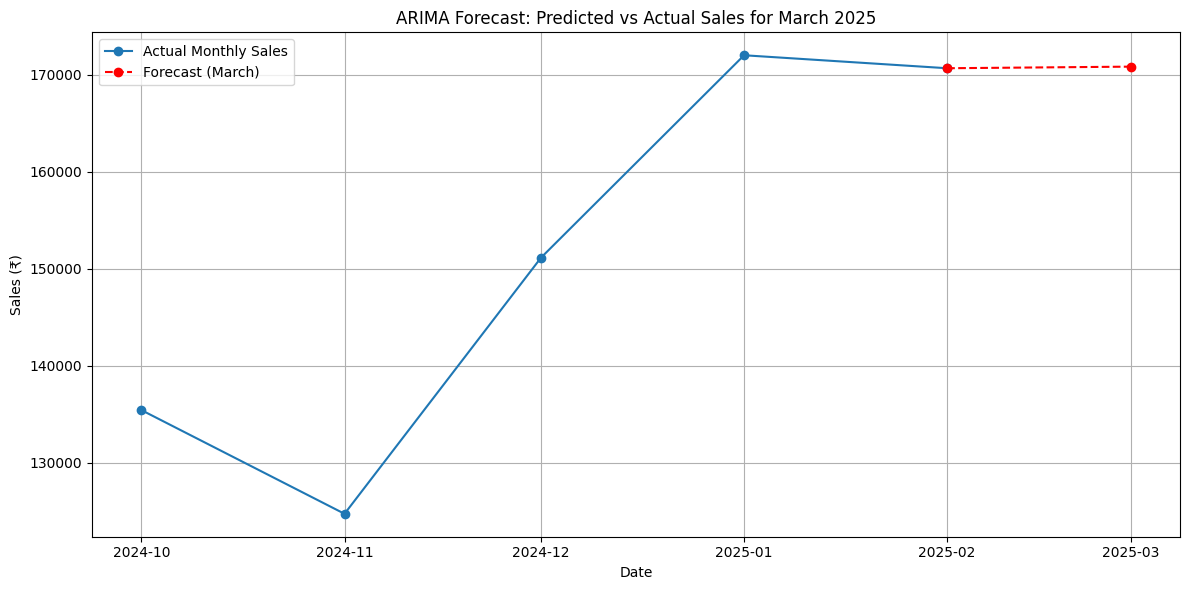

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('/content/Medical Store Data_Processed.csv', encoding='ISO-8859-1')

# Step 1: Clean and convert 'Customer Paid' column
df['Customer Paid'] = df['Customer Paid'].replace('[\₹,]', '', regex=True).astype(float)

# Step 2: Correct date format handling
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Step 3: Remove duplicate bills if needed
df_unique_bills = df.drop_duplicates(subset='Bill No')

# Step 4: Group by month and sum 'Customer Paid'
monthly_sales = df_unique_bills.groupby(df_unique_bills['Date'].dt.to_period('M'))['Customer Paid'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()
monthly_sales.set_index('Date', inplace=True)

# Step 5: Train ARIMA model
y_monthly = monthly_sales['Customer Paid']
model_month = ARIMA(y_monthly, order=(1, 1, 1))
model_month_fit = model_month.fit()

# Step 6: Forecast 1 month (March)
forecast_month = model_month_fit.forecast(steps=1)
predicted_march = forecast_month.iloc[0]

# Step 7: Print forecast
print(f"📅 Predicted March Total (Monthly model): ₹{predicted_march:,.2f}")

# Step 8: Plot with forecast as a red line
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Customer Paid'], label='Actual Monthly Sales', marker='o')

# Extend the timeline by 1 month
last_date = monthly_sales.index[-1]
next_month = last_date + pd.DateOffset(months=1)
forecast_index = [last_date, next_month]
forecast_values = [monthly_sales['Customer Paid'].iloc[-1], predicted_march]

plt.plot(forecast_index, forecast_values, color='red', linestyle='--', marker='o', label='Forecast (March)')

plt.title('ARIMA Forecast: Predicted vs Actual Sales for March 2025')
plt.xlabel('Date')
plt.ylabel('Sales (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**SARIMA FORECAST**

Most sold drug in last 5 months:
           Product Name  Quantity
48  ALPRAX 0.50 MG TAB      1530

Predicted high demand months for next year (seasonal forecast):
2026 1
2026 2
2025 10
2025 11
2025 12


<ipython-input-14-dcf02b171e56>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['MonthYear'] = pd.to_datetime(product_data['MonthYear'])
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


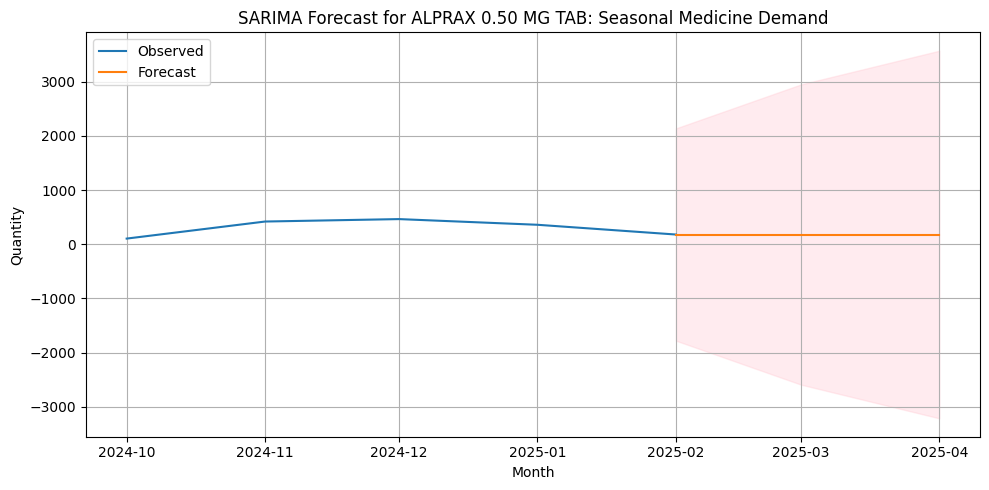

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your dataset
df = pd.read_csv('/content/Medical Store Data_Processed.csv', encoding='ISO-8859-1')  # replace with the correct path

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract Month and Year for grouping
df['MonthYear'] = df['Date'].dt.to_period('M').astype(str)

# Get the latest 5 months
latest_5_months = df['MonthYear'].sort_values().unique()[-5:]

# Filter only the last 5 months
recent_df = df[df['MonthYear'].isin(latest_5_months)]

# Group by Product Name and calculate total Quantity sold
product_sales = recent_df.groupby('Product Name')['Quantity'].sum().reset_index()

# Sort to find the most sold drug
top_product = product_sales.sort_values(by='Quantity', ascending=False).head(1)
print("Most sold drug in last 5 months:\n", top_product)

# Get the sales data for the top-selling product
top_product_name = top_product.iloc[0]['Product Name']
product_data = recent_df[recent_df['Product Name'] == top_product_name]

# Convert MonthYear to datetime
product_data['MonthYear'] = pd.to_datetime(product_data['MonthYear'])

# Aggregate sales by month and calculate total quantity sold for the product
monthly_sales = product_data.groupby('MonthYear')['Quantity'].sum().reset_index()

# Build SARIMA model
model = SARIMAX(monthly_sales['Quantity'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()
# Get the months where the top drug was sold
high_demand_months = recent_df[recent_df['Product Name'] == top_product.iloc[0]['Product Name']]
high_demand_months = pd.to_datetime(high_demand_months['Date'])
high_demand_months = high_demand_months.dt.month.unique()
high_demand_months = sorted(high_demand_months)

# Get the latest year in your data (assumed as the current season's year)
latest_year = df['Date'].dt.year.max()

# Print predicted months for next year
print("\nPredicted high demand months for next year (seasonal forecast):")
for m in high_demand_months:
    if m >= 10:  # Assuming the season starts in Oct and wraps around
      print(f"{latest_year } {m}")
    else:
      print(f"{latest_year + 1} {m}")
# Predict the next 3 months
pred = results.get_forecast(steps=3)
pred_ci = pred.conf_int()

# Plot the SARIMA forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['MonthYear'], monthly_sales['Quantity'], label='Observed')
plt.plot(pd.date_range(monthly_sales['MonthYear'].max(), periods=3, freq='MS'), pred.predicted_mean, label='Forecast')
plt.fill_between(pd.date_range(monthly_sales['MonthYear'].max(), periods=3, freq='MS'),
                 pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title(f"SARIMA Forecast for {top_product_name}: Seasonal Medicine Demand")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**PATIENT ADHERENCE PREDICTION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load and clean data
df = pd.read_csv("/content/Medical Store Data_Processed.csv", encoding='ISO-8859-1')


# Remove commas from numbers and convert to float
for col in ['Quantity', 'Total Amount']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing essential data
df = df.dropna(subset=['Patient Name', 'Product Name', 'Quantity', 'Total Amount'])

# Label encode categorical variables (if needed)
le_patient = LabelEncoder()
df['Patient Name Encoded'] = le_patient.fit_transform(df['Patient Name'])
# Feature creation
df['Previous Purchase'] = df.groupby(['Patient Name', 'Product Name'])['Bill No'].shift(1)  # Track previous purchases
df['Purchase Count'] = df.groupby(['Patient Name', 'Product Name']).cumcount() + 1  # Count the number of purchases

# Create the target variable (will buy the same product again)
df['Target'] = df['Purchase Count'].apply(lambda x: 1 if x > 1 else 0)  # 1 if the patient buys the same medicine more than once, else 0

# Group by patient and engineer features for prediction
patient_summary = df.groupby('Patient Name').agg(
  visits=('Bill No', 'nunique'),
  unique_meds=('Product Name', 'nunique'),
  total_spent=('Total Amount', 'sum'),
  avg_quantity=('Quantity', 'mean')
).reset_index()

# Prepare features and labels for the model
X = patient_summary[['visits', 'unique_meds', 'total_spent', 'avg_quantity']]
y = df.groupby('Patient Name')['Target'].max()  # Max target value for each patient (if they bought something again)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions for all patients
predictions = model.predict(X)

# Convert 0/1 to Yes/No
prediction_labels = ['Yes' if pred == 1 else 'No' for pred in predictions]

# Add predictions to the patient summary
patient_summary['Prediction (YES/NO)'] = prediction_labels

# Save the result to an Excel file
output_file = "/content/patient_purchase_predictions.xlsx"
patient_summary.to_excel(output_file, index=False)

# Notify that the result has been saved
print(f"Results have been saved to: {output_file}")


Results have been saved to: /content/patient_purchase_predictions.xlsx


**STOCK EXPIRY PREDICTION**

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from datetime import datetime

# Step 2: Load CSV with encoding fix
df = pd.read_csv('/content/Medical Store Data_Processed.csv', encoding='latin1')

# Step 3: Convert 'Expiry' to datetime
df['Expiry'] = pd.to_datetime(df['Expiry'], format='%b-%y', errors='coerce') + pd.offsets.MonthEnd(0)

# Step 4: Drop invalid expiry dates
df = df.dropna(subset=['Expiry'])

# Step 5: Calculate Days to Expiry
today = pd.Timestamp.today()
df['Days_to_Expiry'] = (df['Expiry'] - today).dt.days

# Step 6: Define expiry status
def classify_status(days):
    if days < 0:
        return 'Expired'
    elif days <= 90:
        return 'Near Expiry'
    else:
        return 'Safe'

df['Predicted_Expiry_Status'] = df['Days_to_Expiry'].apply(classify_status)

# Step 7: Prepare features and label
X = df[['Days_to_Expiry']]
y = df['Predicted_Expiry_Status']

# Step 8: Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 9: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 10: Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 11: Predictions
y_pred = rf_model.predict(X_test)

# Step 12: Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Step 13: Show Near Expiry Products
near_expiry_products = df[df['Predicted_Expiry_Status'] == 'Near Expiry']
print("\nProducts Predicted as Near Expiry:\n")
print(near_expiry_products[['Product Name', 'Expiry', 'Days_to_Expiry', 'Predicted_Expiry_Status']])



Classification Report:

              precision    recall  f1-score   support

     Expired       1.00      1.00      1.00         2
 Near Expiry       1.00      1.00      1.00         7
        Safe       1.00      1.00      1.00       458

    accuracy                           1.00       467
   macro avg       1.00      1.00      1.00       467
weighted avg       1.00      1.00      1.00       467


Products Predicted as Near Expiry:

                  Product Name     Expiry  Days_to_Expiry  \
19              BECOSULES CAPS 2025-04-30              12   
40                  LOSAR 25MG 2025-05-31              43   
45              VOLINI GEL 15G 2025-05-31              43   
53    GELUSIL MPS 200ML LIQUID 2025-06-30              73   
80             BETNOVATE N.G-D 2025-06-30              73   
82       ENCORATE CHRONO 200MG 2025-05-31              43   
92              AZTOLET -10 MG 2025-04-30              12   
151          ECOSPRIN 75MG TAB 2025-05-31              43   
194     